<h3 style="color:crimson">Artificial Intelligence - 2022-2023 Fall Semester - Nişantaşı University</h3>


## Görkem Karamolla 20202022043

### DATASET LINK  ↓ 
https://www.kaggle.com/datasets/jakeshbohaju/brain-tumor

<h2>This is a brain tumor features dataset including five first order features and eight texture features with the targt level(in the column Class). </h2>
<h1 style="color:#c71242">First order Features</h1>
        <ul>
            <li>
                <b>Mean:</b
                ><i>
                    Gives The contribution of invidual pixel intensity for the
                    image.</i
                >
            </li>
            <li>
                <b>Variance:</b
                ><i
                    >Used to find how each pixel varies from the neigbouring
                    pixel.</i
                >
            </li>
            <li>
                <b>Standard Deviation:</b
                ><i
                    >Measures the deviation of measured valeus or the data from
                    its mean</i
                >
            </li>
            <li>
                <b>Skewness:</b
                ><i
                    >Measures the symmetry, or more precisely,the lack of
                    symmetry</i
                >
            </li>
            <li>
                <b>Kurtosis:</b
                ><i
                    >Describes the peakedness of e.g. a frequency
                    distribution</i
                >
            </li>
        </ul>
<h1 style="color:#c71242">Second order Features</h1>
       <ul>
            <li>
                <b>Contrast: </b
                ><i>The difference in luminance or colour across the image.</i>
            </li>
            <li>
                <b>Energy:</b
                ><i
                    >It's the rate of change in color/brightness/magnitude of
                    the pixels over local areas.</i
                >
            </li>
            <li>
                <b>Entropy:</b
                ><i
                    >Entropy is a statistical measure of randomness that can be
                    used to characterize the texture of the image.</i
                >
            </li>
            <li>
                <b>Homogeneity:</b
                ><i
                    >Homogeneity expresses how similar certain elements (pixels)
                    of the image are.</i
                >
            </li>
            <li>
                <b>Dissimilarity:</b
                ><i
                    >Is a numerical measure of how different two data objects
                    are.</i
                >
            </li>
            <li>
                <b>Correlation:</b
                ><i
                    >Correlation is the process of moving a filter mask often
                    referred to as kernel ovr the image and computing
                    location(CNN alike).</i
                >
            </li>
            <li>
                <b>Coarseness:</b
                ><i>Describes the roughness/harshness of a texture</i>
            </li>
        </ul>
<i><b>  <p style="font-size:18px"> Image column defines the image name and Class column defines a tumor
    label (1 = Tumor, 0 = Non-Tumor)</p></b></i

In [33]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import matplotlib as matp
import numpy as np
import cv2
import glob
from PIL import Image
import matplotlib.image as mpimg
import random
import seaborn as sns
import os as os
import shutil
from shutil import copyfile
from tqdm import tqdm
import mplcursors
from mplcursors import cursor
from tkinter import *
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
base_dir=os.getcwd();
dataframe = pd.read_csv(base_dir+"/Brain Tumor/Brain Tumor.csv")

print(base_dir)
display(dataframe.head())
print(dataframe.shape)

C:\Users\gorke\AI PROJECT


,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


(3762, 15)


In [3]:
dataframe.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


<h2 style="color:crimson">Class Value 0 indicates no tumor on image, Class Value 1 indicates image with tumor</h2>

In [4]:
df = pd.read_csv("Brain Tumor/Brain Tumor.csv")[['Image', 'Class']]
display(df.head())
print(df.shape)

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


(3762, 2)


<h2 style="color:crimson">Frequency Of Data on Class</h2>

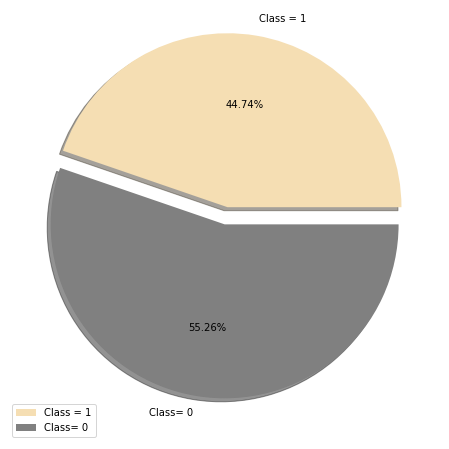

In [5]:
arr=np.array(dataframe[["Class"]]);
arr0=[]
arr1=[]
for i in arr:
    if(i==0):
        arr0.append(i)
    else:
        arr1.append(i)

plt.figure(figsize= (12, 8))
data_pie  = [len(arr1),len(arr0)]
labels = ["Class = 1", "Class= 0"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['wheat', 'gray'])
plt.legend()
plt.show()

<h3 style="color:red">Scaling of the Dataset<h/3>

In [6]:
scalable=['Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness']


dataframe[scalable]=StandardScaler().fit_transform(dataframe[scalable])
dataframe.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03
mean,0.447368,6.731576e-17,1.034231e-16,3.018142e-16,4.308681e-18,6.657831e-17,1.671827e-17,4.621503e-17,1.442228e-16,-5.289053e-16,-8.196674e-16,6.722722e-17,4.220736e-16,-4.725695e-171
std,0.497288,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,0.000000e+00
min,0.000000,-1.643060e+00,-1.514652e+00,-2.668459e+00,-1.035037e+00,-8.657006e-01,-3.623545e-01,-1.139578e+00,-1.391539e+00,-9.953228e-01,-2.922023e+00,-2.171641e+00,-1.553686e+01,-1.117857e-168
25%,0.000000,-7.868500e-01,-7.442706e-01,-6.980786e-01,-9.499968e-01,-5.789751e-01,-3.036870e-01,-5.099897e-01,-1.044483e+00,-9.226728e-01,-8.934198e-01,-6.952353e-01,-3.299313e-01,-1.117857e-168
50%,0.000000,-1.765868e-01,-1.893876e-01,-2.629972e-02,-9.926889e-02,-2.657648e-01,-2.131946e-01,-1.938533e-01,1.607566e-01,-1.335147e-01,2.603295e-01,-1.168118e-01,2.234167e-01,-1.117857e-168
75%,1.000000,6.501944e-01,5.473912e-01,6.741194e-01,5.647895e-01,2.144068e-01,-3.099154e-02,3.023020e-01,7.283155e-01,5.268330e-01,7.528979e-01,5.542510e-01,5.960229e-01,-1.117857e-168
max,1.000000,4.147024e+00,4.705730e+00,3.279339e+00,4.567876e+00,1.282066e+01,2.387589e+01,2.972655e+01,2.976598e+00,4.959343e+00,2.592945e+00,1.250279e+01,1.307888e+00,1.348053e-167


<h3 style="color:crimson">Histograms for  distribution of first order features in the dataset</h3>


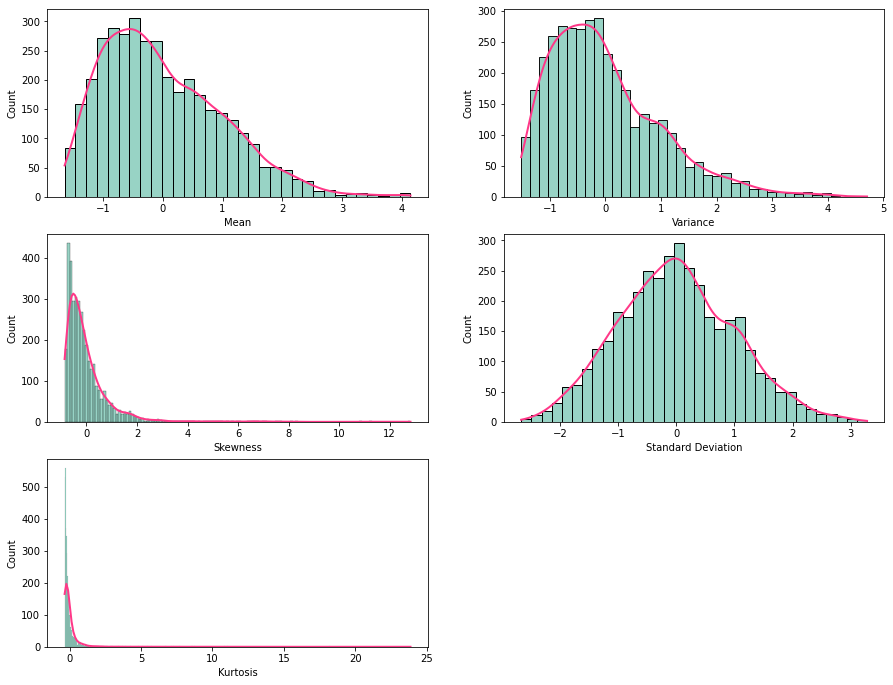

In [30]:
distplot_df=dataframe.loc[:,['Mean','Variance', 'Skewness', 'Standard Deviation', 'Kurtosis']]

fig = plt.figure(figsize=(15, 20))
for i, column in enumerate(distplot_df.columns, 1):
    f=plt.subplot(5,2,i)
    ax = sns.histplot(data=distplot_df[column], color="#32a88d",kde=True, line_kws={'color': '#a83290', 'lw': 2, });
    ax.lines[0].set_color('#ff3888')
    

<h3 style="color:crimson">Histograms for  distribution of second order features in the dataset</h3>

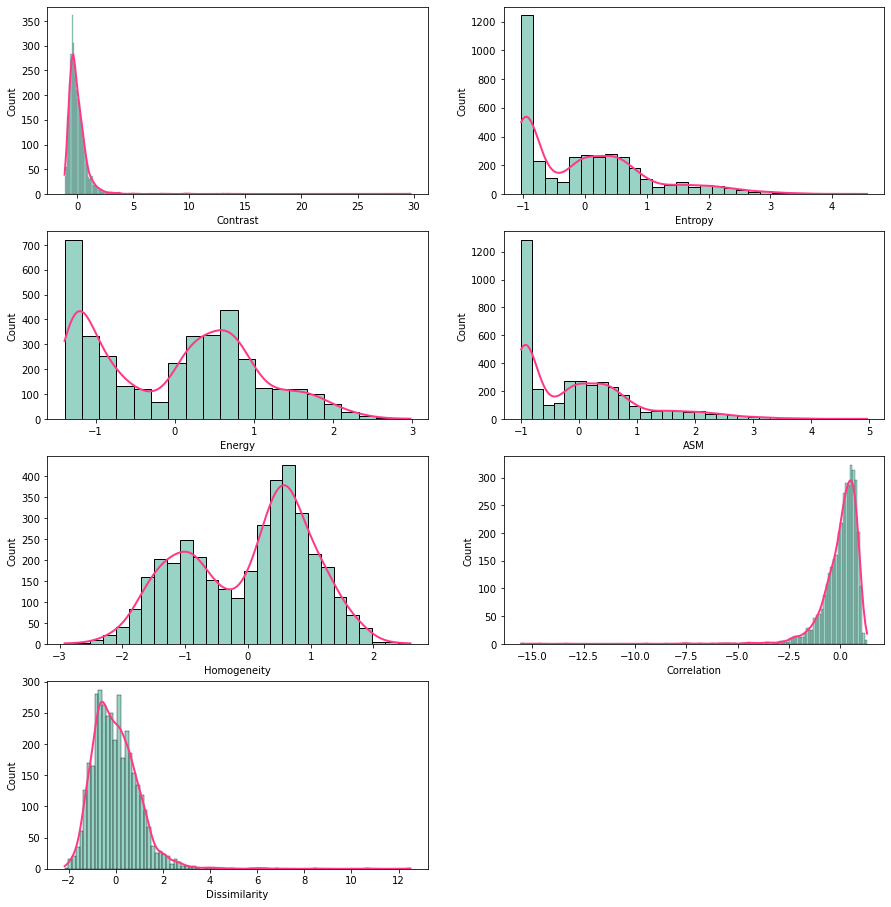

In [31]:
distplot_df=dataframe.loc[:,['Contrast','Entropy', 'Energy', 'ASM', 'Homogeneity','Correlation','Dissimilarity']]

fig = plt.figure(figsize=(15, 20))
for i, column in enumerate(distplot_df.columns, 1):
    f=plt.subplot(5,2,i)
    ax = sns.histplot(data=distplot_df[column], color="#32a88d",kde=True, line_kws={'color': 'crimson', 'lw': 2, });
    ax.lines[0].set_color('#ff3888')

    


<h3><i style="color:#76a7e3"> This <b style="color:red">Mean</b> feature it comes from the dataset itself and it is already calculated. Value shows individual pixel intensity for the entire images.</i></h3>

<AxesSubplot:xlabel='Mean'>

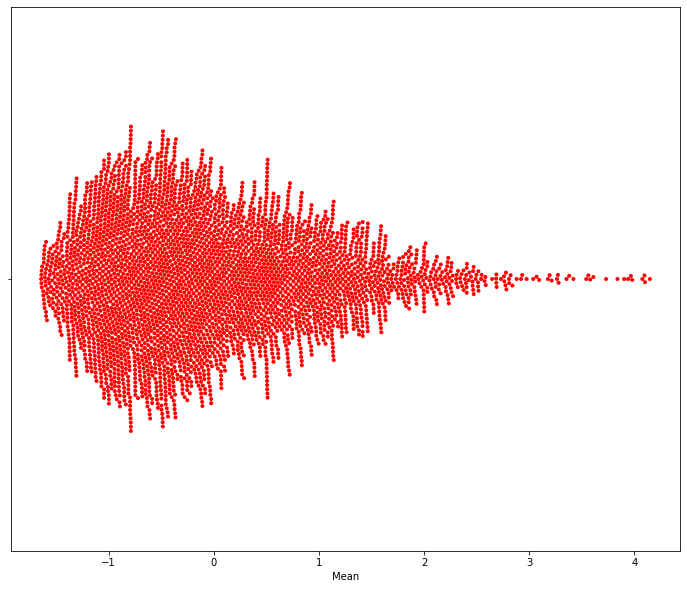

In [9]:
plt.figure(figsize=(12, 10))
sns.swarmplot(x="Mean",data=dataframe,s=4, color="red")

<h3 style="color:#76a7e3;"><i>Classification of the Data in this Figure it shows the Homogenity distribution of images with Tumor and without tumor zero means image doesn't have tumor and 1 means image has tumor</i>
</h3>

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

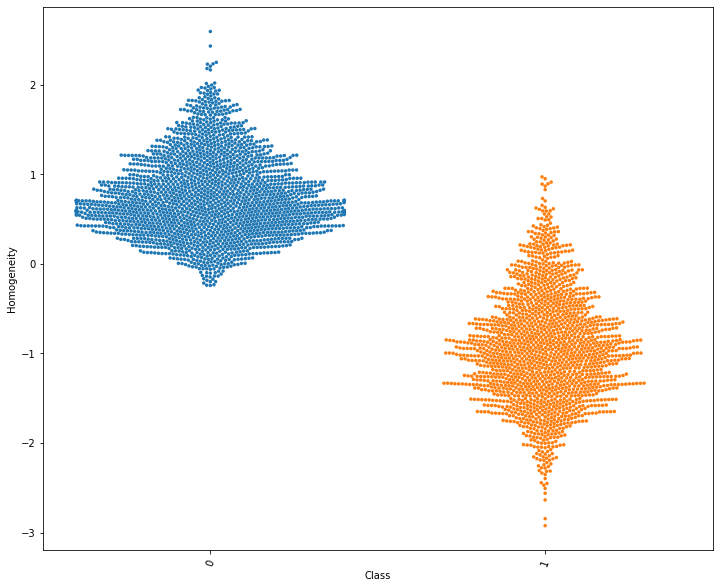

In [10]:
plt.figure(figsize=(12, 10))
sns.swarmplot(x="Class",y="Homogeneity",data=dataframe,s=3.5)
plt.xticks(rotation=70)

<h3 style="color:crimson"><i> Note : I split the data into three parts for training,validation and testing in the following ratios,
and I also saved them in different folders

 </i></h3>

In [11]:
def split_size(df, size):
    return int(size * len(df))


train_labels = df['Class'].values[:split_size(df, 0.8)]
train_file_names = df['Image'].values[:split_size(df, 0.8)]

val_labels = df['Class'].values[split_size(df, 0.8):split_size(df, 0.9)]
val_file_names = df['Image'].values[split_size(df, 0.8):split_size(df, 0.9)]

test_labels = df['Class'].values[split_size(df, 0.9):]
test_file_names = df['Image'].values[split_size(df, 0.9):]

In [12]:
def split_array_labels(arr_image, arr_label):
    arr_image_0 = arr_image[np.where(arr_label==0)]
    arr_image_1 = arr_image[np.where(arr_label==1)]
    return {'0':arr_image_0, '1':arr_image_1}

In [13]:
train_arr_dict = split_array_labels(train_file_names, train_labels)
val_arr_dict = split_array_labels(val_file_names, val_labels)
test_arr_dict = split_array_labels(test_file_names, test_labels)

In [14]:
def create_empty_directories(base_dir):
    check_exist_path = os.path.join(base_dir, '_MODELLING')
    if os.path.isdir(check_exist_path):
        shutil.rmtree(check_exist_path)
        print("Old directories removed")
    
    for label in ['0','1']:
        training_dir = os.path.join(base_dir, '_MODELLING', 'training', label)
        validation_dir = os.path.join(base_dir, '_MODELLING', 'validation', label)
        testing_dir = os.path.join(base_dir, '_MODELLING', 'testing', label)
        
        
        
        os.makedirs(training_dir)
        os.makedirs(validation_dir)
        os.makedirs(testing_dir)
    print(f"Created empty  training, validation and testing directories")
create_empty_directories(base_dir)

Created empty  training, validation and testing directories


In [16]:
def split_data(SOURCE_DIR, train_arr_dict, val_arr_dict, test_arr_dict):
    for label in tqdm(['0','1']):
        for file_name in train_arr_dict[label]:
            file_name = f"{file_name}.jpg"
            source = os.path.join(SOURCE_DIR, 'Brain Tumor', 'Brain Tumor', file_name)
            destination = os.path.join(base_dir, '_MODELLING', 'training', label, file_name)
            copyfile(source, destination)

        for file_name in val_arr_dict[label]:
            file_name = f"{file_name}.jpg"
            source = os.path.join(SOURCE_DIR, 'Brain Tumor', 'Brain Tumor', file_name)
            destination = os.path.join(base_dir, '_MODELLING', 'validation', label, file_name)
            copyfile(source, destination)
        
        for file_name in test_arr_dict[label]:
            file_name = f"{file_name}.jpg"
            source = os.path.join(SOURCE_DIR, 'Brain Tumor', 'Brain Tumor', file_name)
            destination = os.path.join(base_dir, '_MODELLING', 'testing', label, file_name)
            copyfile(source, destination)
    print(f"Created training, validation and testing directories containing images")
    
split_data(base_dir+"\\Brain Tumor",train_arr_dict,val_arr_dict,test_arr_dict)

100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

Created training, validation and testing directories containing images


In [17]:
imgExtension = ["png", "jpeg", "jpg"] 
%matplotlib inline

def chooseRandomImage(directory):
    allImages = list()
    for img in os.listdir(directory):
        ext = img.split(".")[len(img.split(".")) - 1]
        if (ext in imgExtension):
            allImages.append(img)
    imglist=[]
    labellist=[]
    for randomimg in random.sample(allImages,6):
        img=mpimg.imread(directory+randomimg)
        imglist.append(img)
        labellist.append(randomimg)
       
    
         
    fig = plt.figure(figsize=(40., 40.))
    grid = ImageGrid(fig, 111,nrows_ncols=(3, 2),axes_pad=4,
                     label_mode="2",
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="each",
                     cbar_size="5%",
                     cbar_pad="5%",)

    for i,ax, img,lbl in zip(range(len(imglist)),grid, imglist,labellist):
        num= lbl.split(".")[0]
        imgNumber = int(num.split("Image")[1])
        
        ax.set_title(str(dataframe.iloc[imgNumber-1]), fontdict=None, loc='left', color = "k")
     
        
        
        lum_img = img[:, :, 0]
        ax.imshow(lum_img)
        plt.imshow(lum_img,cmap="hot")
        im=ax.imshow(lum_img,cmap=matp.colormaps['nipy_spectral'])
        grid.cbar_axes[i].colorbar(im)
        ax.cax.toggle_label(True)
        t = add_inner_title(ax, lbl, loc='lower left')
        t.patch.set_alpha(1)
plt.show()  


def add_inner_title(ax, title, loc, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    from matplotlib.patheffects import withStroke
    prop = dict(path_effects=[withStroke(foreground='y', linewidth=5)],
                size=plt.rcParams['legend.fontsize'])
    at = AnchoredText(title, loc=loc, prop=prop,
                      pad=0., borderpad=0.5,
                      frameon=False, **kwargs)
    ax.add_artist(at)
    return at

<h3 style="color:darkblue"> <i>I have chosen random samples from the testing images splitted in the previous cells. I also added to the image each images columns and values also i gave cmap and extra color feature to see the tumor more clear</i></h3>

<h3 style="color:green">Random 6 Samples of Healthy Brain Images</h3>

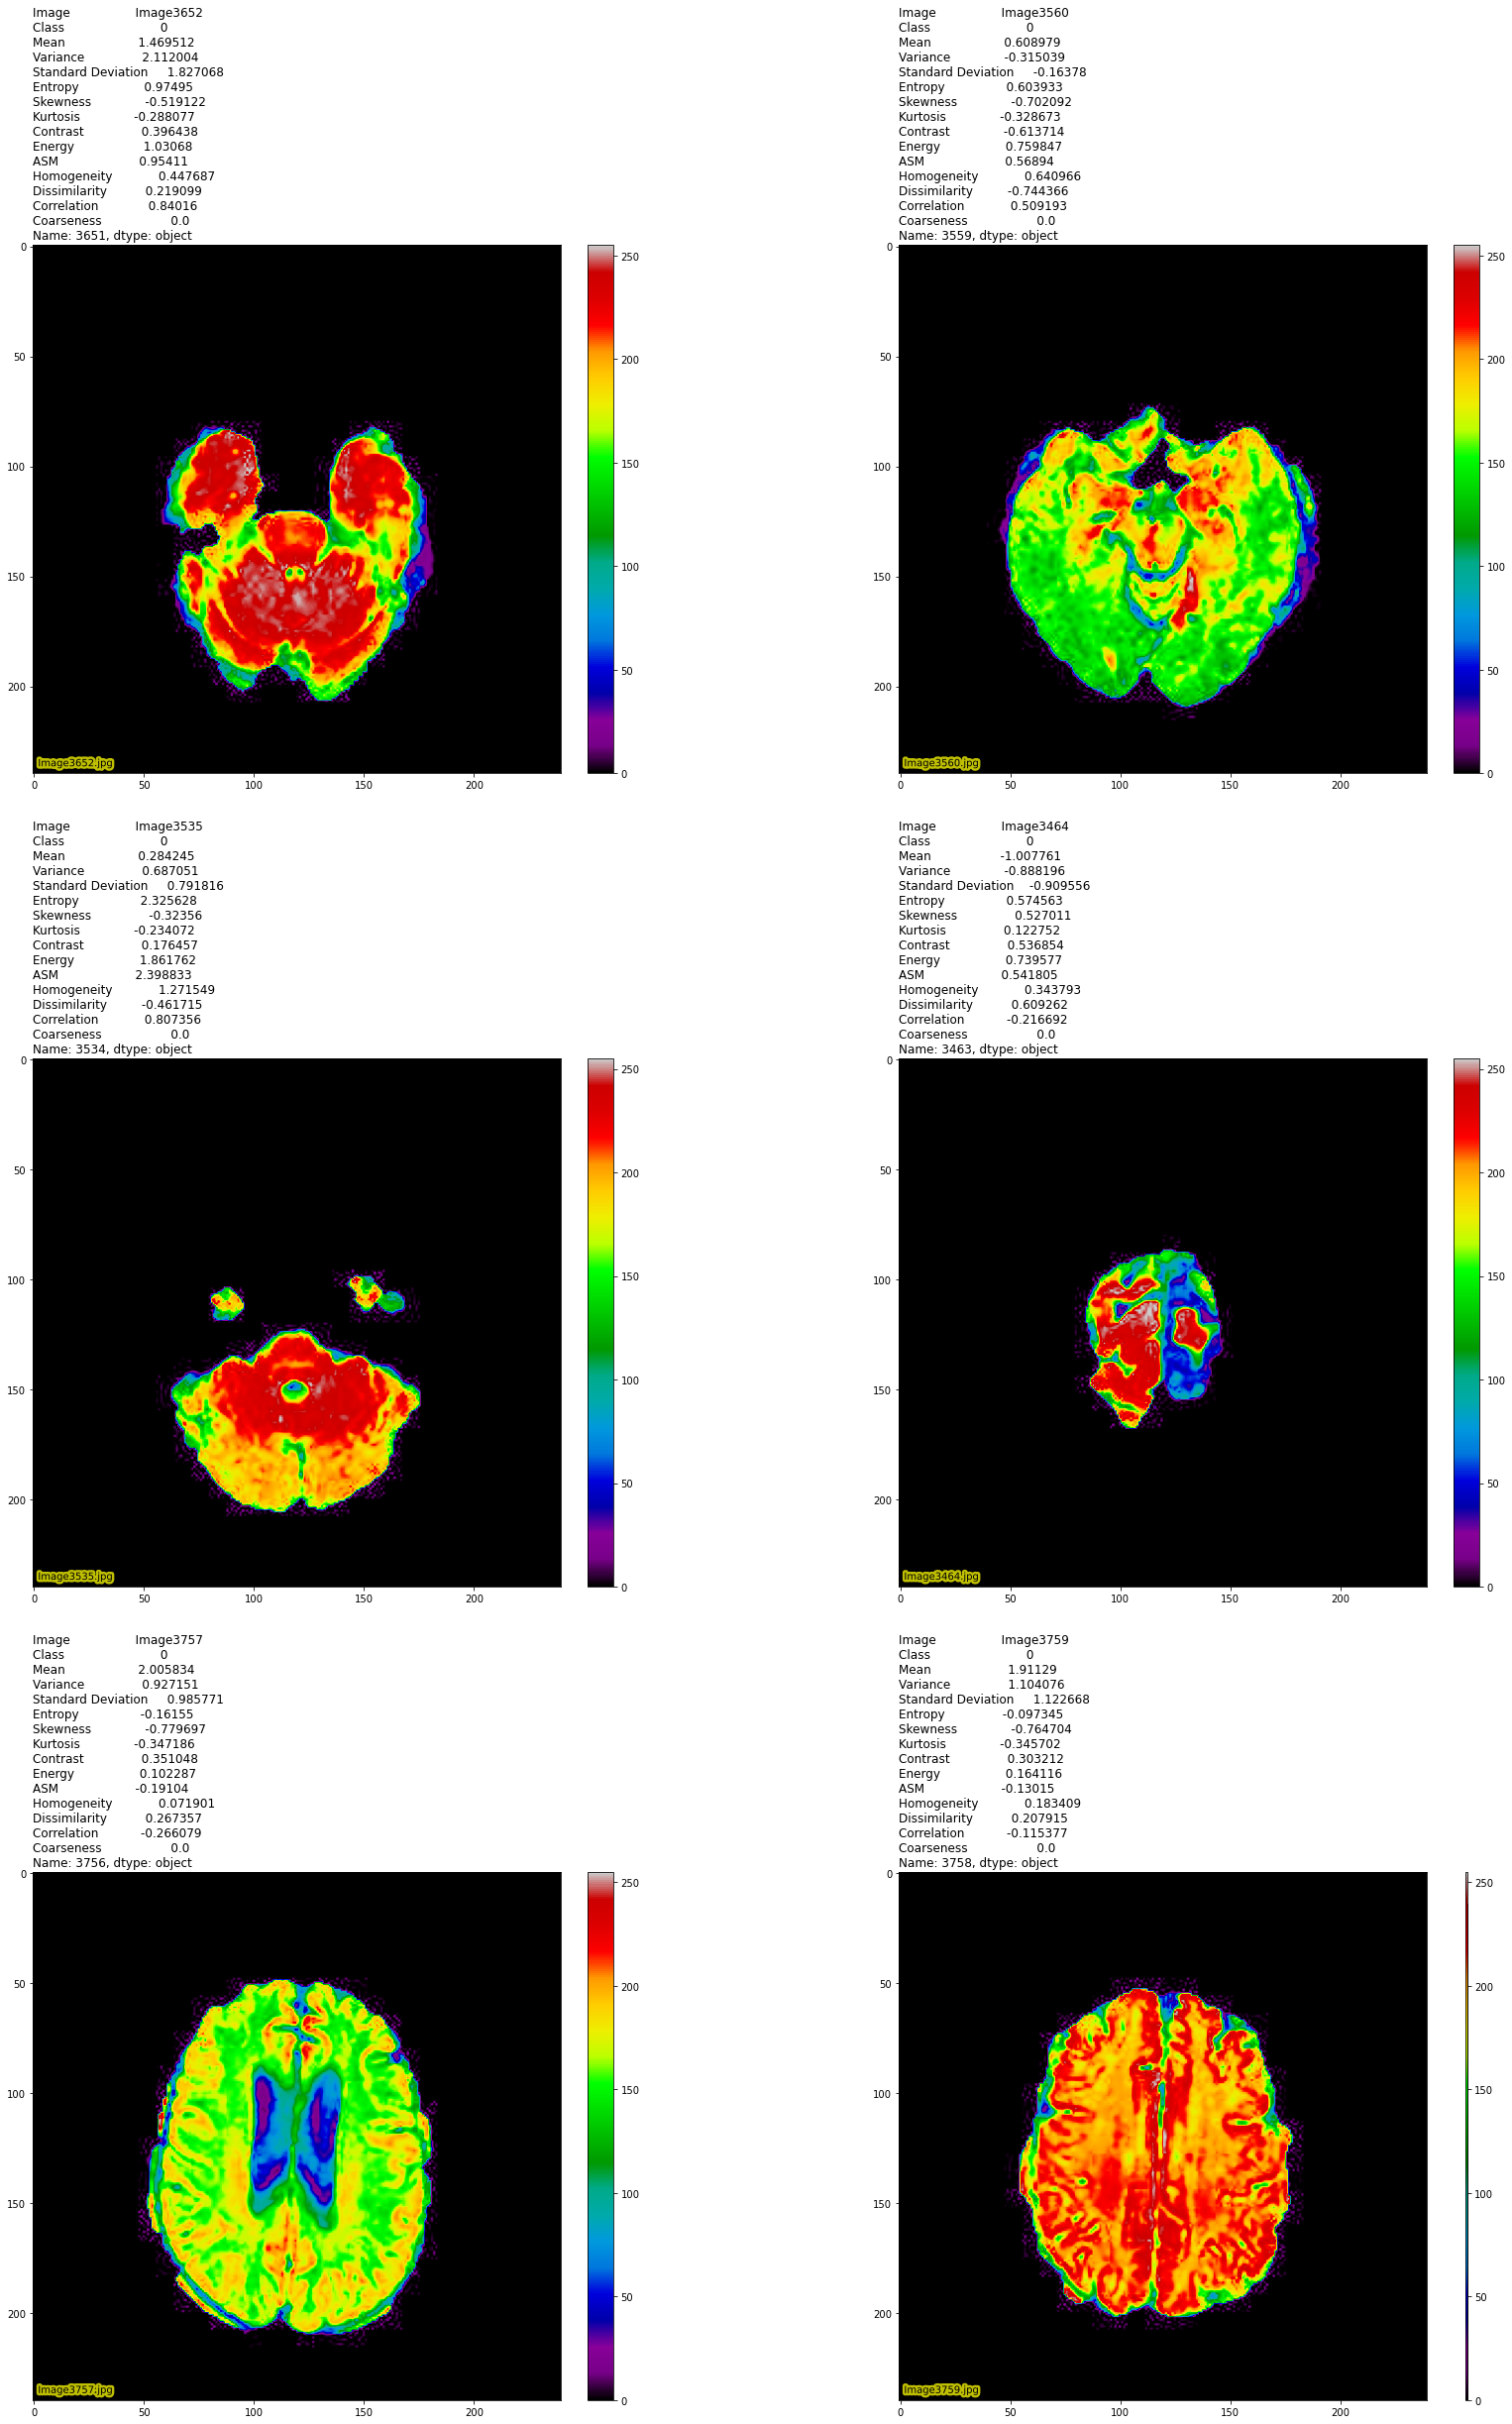

In [18]:
chooseRandomImage("_MODELLING/testing/0/")

<h3 style="color:crimson">Random 6 Samples of Brain Tumor Images</h3>

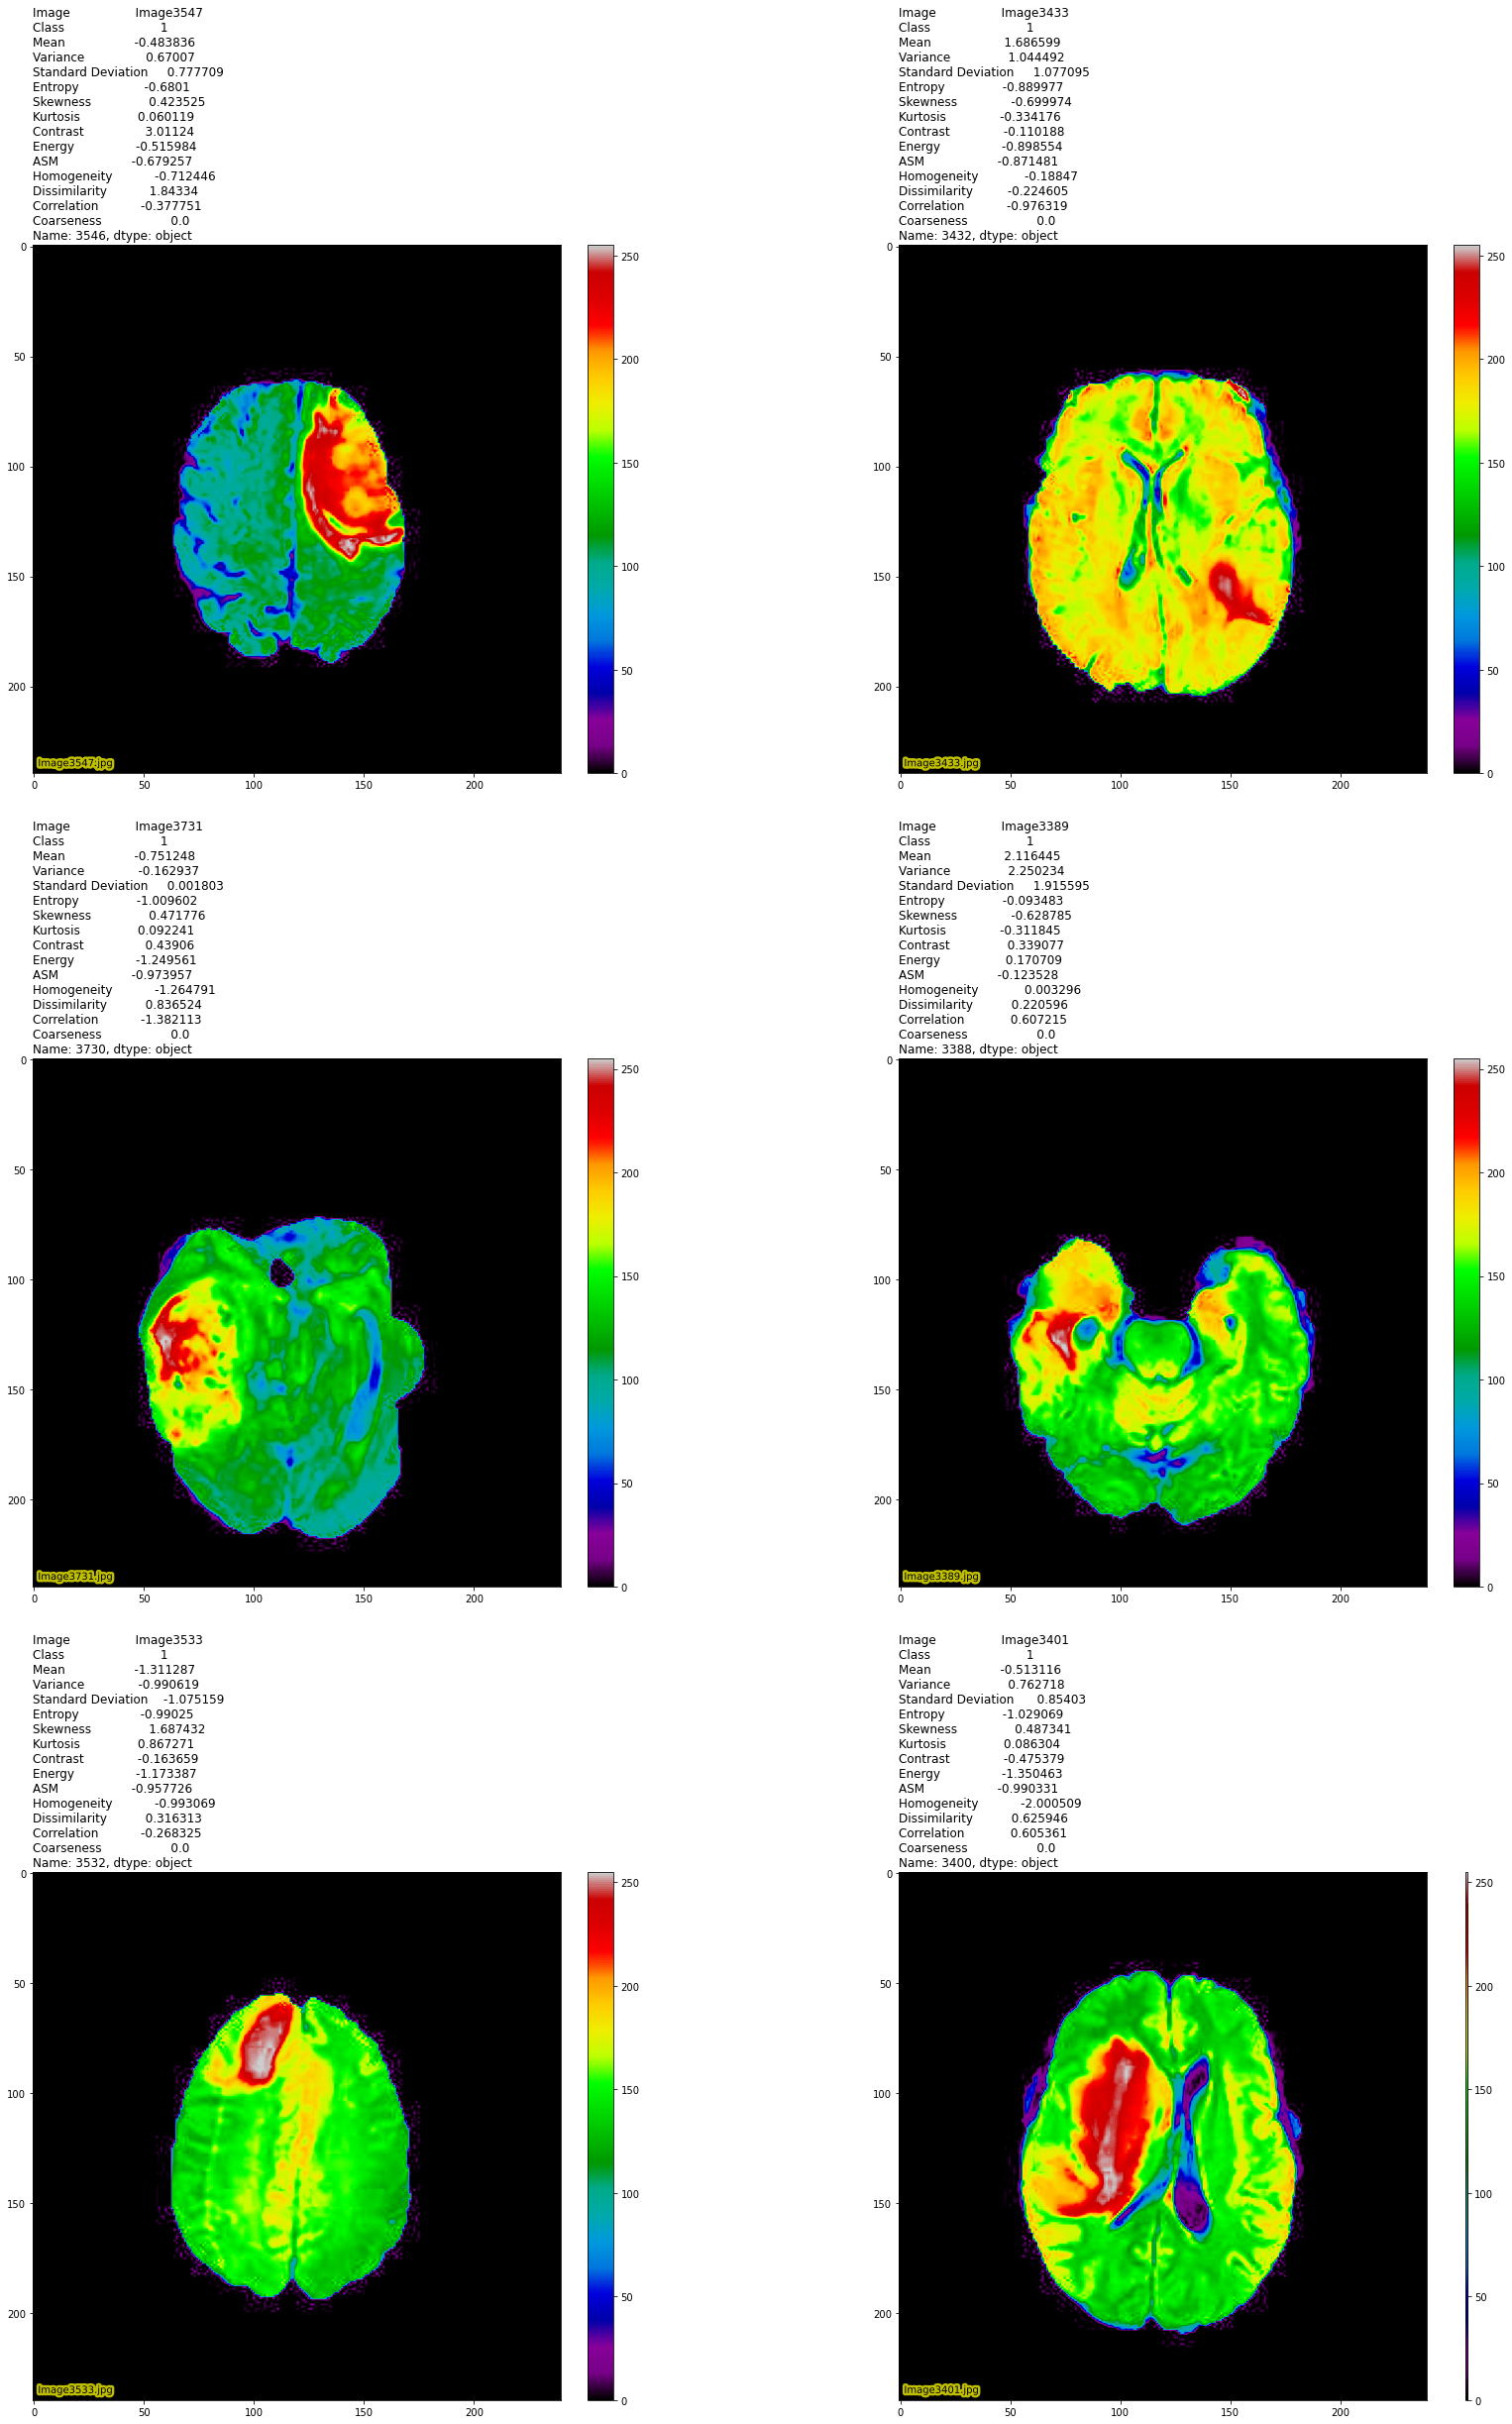

In [19]:
chooseRandomImage("_MODELLING/testing/1/")